# Building Logistic Regression classifier model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"test.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["satisfaction"] = le.fit_transform(data["satisfaction"])


data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [7]:




Y = data.iloc[:,-1]
X = data["Online boarding"]

from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values

In [23]:
X.shape

(25976,)

In [8]:
def featureNormalization(X):

    Xmean=np.mean(X,axis=0)
    
    Xstd=np.std(X,axis=0)
    
    X_norm = (X - Xmean)/ Xstd
    
    return X_norm

x_train = featureNormalization(x_train)
x_test = featureNormalization(x_test)



In [9]:
def sigmoid(z):
    
    return 1/(1 + np.exp(-z))
sigmoid(0)

0.5

In [10]:
def costFunction(X, Y,theta):
    
    m=len(Y)
    
    hox = sigmoid(np.dot(X,theta))
    
    error = (-Y * np.log(hox)) - ((1-Y)* np.log(1-hox))
    
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(hox - Y))
    
    return cost[0] , grad

In [11]:
m = x_train.shape[0]
n = x_train.shape[1]
k = x_test.shape[0]
X_train = np.append(np.ones((m,1)), x_train, axis=1)
X_test = np.append(np.ones((k,1)), x_test, axis=1)
Y_train = y_train.reshape(m,1)
theta = np.zeros((n+1,1))



In [12]:
def gradientDescent(X_train,Y_train,theta,alpha,num_iters):
    
    m=len(Y_train)
    J =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(X_train,Y_train,theta)
        theta = theta - (alpha * grad)
        J.append(cost)
    
    return theta , J

theta,J = gradientDescent(X_train,Y_train,theta,0.01,2000)




#print("J(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1"+ " + " +str(round(theta[2,0],2))+"x2")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

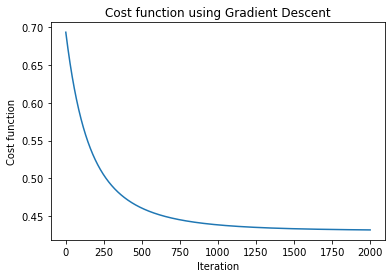

In [13]:

plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.title("Cost function using Gradient Descent")



In [14]:
def predict(x):
    prediction = sigmoid(x.dot(theta))
    for i in range(len(prediction)):
        if prediction[i]>=0.5:
            prediction[i] = 1
        else:
            prediction[i] = 0
    return prediction
    
y_pred = predict(X_test)

In [15]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm

array([[3964,  833],
       [ 830, 2946]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))
    
print_metrics(y_test, y_pred) 

Precision Score: 0.8032191160711497
Recall Score: 0.8032702399628299
Accuracy Score: 0.8060188965356352
F1 Score: 0.8032445760940812


# Logistic Regression with Scikit-learn 


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"test.csv")
data



,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [12]:
data["Class"].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [13]:
data.iloc[:,-1].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [18]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["satisfaction"] = le.fit_transform(data["satisfaction"])
data["Customer Type"] = le.fit_transform(data["Customer Type"])



data["Class"] = data["Class"].map({ "Eco":1,"Eco Plus":2,"Business":3})


"""data["JobType"] = data["JobType"].map({" ?":np.nan, " Never-worked":0,
                                       " Without-pay":1," Self-emp-not-inc":2,
                                       " Self-emp-inc":3," Private":4,
                                         "Local-gov":5," State-gov":6," Federal-gov":7," Without-pay":8})"""





Y = data.iloc[:,-1]
X = data["Online boarding"]

from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X1,Y,test_size=0.33, random_state=0)

x_train = x_train.sort_index().values
y_train = y_train.sort_index().values
x_test = x_test.sort_index().values
y_test = y_test.sort_index().values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)




In [20]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)

cm1


array([[3964,  833],
       [ 830, 2946]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))
    scores = cross_val_score(lr, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: ", (scores.mean()))
    
print_metrics(y_test, y_pred) 


Precision Score: 0.8032191160711497
Recall Score: 0.8032702399628299
Accuracy Score: 0.8060188965356352
F1 Score: 0.8032445760940812
Accuracy:  0.8061827754608764
